<div style="display:float">
  <h1 style="margin-top: 36px; font-size: 32px; float:left">Tensorflow and Keras: Getting Started</h1>
  <img style="vertical-align:middle; float:right" src="http://34.125.19.140/wp-content/uploads/2021/05/Small_Logo-278x64.jpg" width=250px>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

## Loading MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


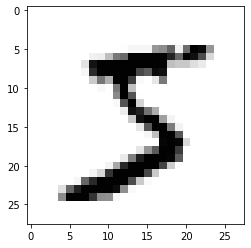

In [4]:
plt.imshow(x_train[0], cmap='Greys')

## Training with one-hot labels

In [5]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)

1875/1875 [==============================] - 21s 11ms/step - loss: 0.4704 - accuracy: 0.8775


## Training with sparse labels

In [7]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
# model_lr.fit(x_train, y_train)

In [9]:
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

## Review Traning Results

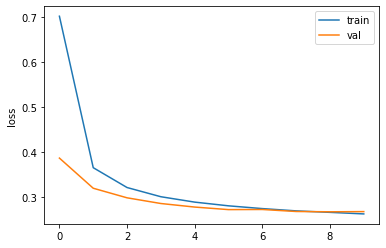

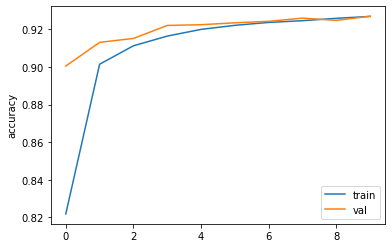

In [11]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.2673 - accuracy: 0.9270


[0.2673257291316986, 0.9269999861717224]

[1.2879221e-05 2.1657295e-10 2.6002503e-05 4.5591965e-03 5.6135201e-07
 3.0789168e-05 2.4099078e-09 9.9493933e-01 2.6420346e-05 4.0486324e-04]  =>  7


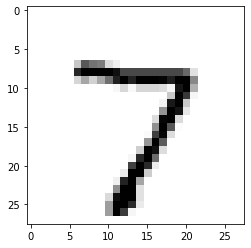

[4.4145665e-04 5.7636162e-06 9.8767334e-01 5.5756752e-04 4.7252333e-13
 5.5181109e-03 5.6801997e-03 7.9660281e-15 1.2346941e-04 2.5580460e-11]  =>  2


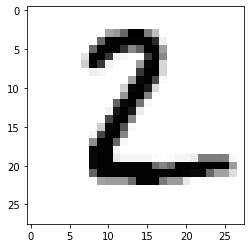

[6.8478034e-06 9.7437119e-01 1.2328540e-02 3.2438592e-03 2.2412660e-04
 1.0845509e-03 1.9448842e-03 2.1269051e-03 4.2978683e-03 3.7139619e-04]  =>  1


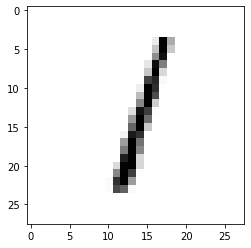

[9.9969471e-01 3.6078137e-11 4.2623378e-05 2.8349177e-06 1.4231089e-08
 6.9641130e-05 1.5235326e-04 1.1038833e-05 1.8208690e-05 8.6015862e-06]  =>  0


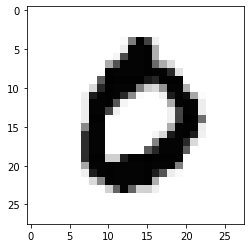

[6.3491525e-04 1.1426222e-06 2.0269856e-03 5.8059719e-05 9.5389491e-01
 1.9240337e-04 3.6617583e-03 3.4056748e-03 6.1773844e-03 2.9946735e-02]  =>  4


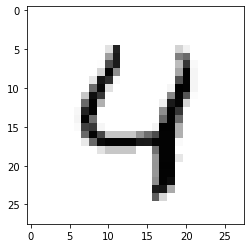

In [16]:
probs = model_lr.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [18]:
model_lr.predict(x_test[18].reshape(1,28,28))

array([[1.2965033e-04, 2.5506788e-05, 9.1638863e-02, 7.5159627e-01,
        1.8873444e-04, 9.4172135e-02, 2.9363675e-02, 4.6079873e-05,
        3.2826550e-02, 1.2577285e-05]], dtype=float32)

In [19]:
model_lr.predict(x_test[18:19])

array([[1.2965033e-04, 2.5506788e-05, 9.1638863e-02, 7.5159627e-01,
        1.8873444e-04, 9.4172135e-02, 2.9363675e-02, 4.6079873e-05,
        3.2826550e-02, 1.2577285e-05]], dtype=float32)

## Adding Model Complexity

In [20]:
model_mlp = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(64, activation='elu'),
        layers.Dense(64, activation='elu'),
        layers.Dense(10, activation='softmax')
    ])
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

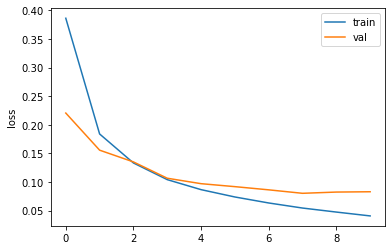

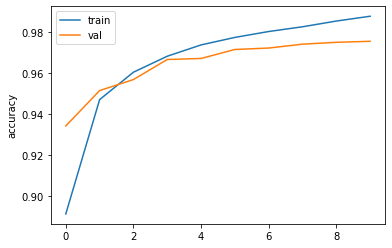

In [22]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()